In [1]:
from scipy import stats
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
import requests
import seaborn as sns 
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [3]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

req = requests.get(URL)

In [4]:
match req.status_code:
    case 200:
        df = pd.read_csv(URL)
    case 404:
        raise 'Probkem con'
    case _ :
        raise f'Somthing wrong{req.status_code}'

In [11]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [12]:
df.shape

(3694, 14)

In [15]:
df.isna().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [17]:
df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [18]:
df.category.unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [19]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [20]:
df = df.drop(['item_id', 'link'], axis=1)

In [21]:
df[df.category == 'Bar furniture'].describe()

,Unnamed: 0,price,depth,height,width
count,47.000000,47.000000,27.000000,35.000000,37.000000
mean,23.000000,679.553191,46.925926,97.571429,52.945946
std,13.711309,604.600148,5.703750,14.727497,14.933084
min,0.000000,40.000000,36.000000,43.000000,36.000000
25%,11.500000,245.000000,44.000000,97.000000,40.000000
50%,23.000000,445.000000,47.000000,102.000000,48.000000
75%,34.500000,895.500000,51.000000,104.500000,70.000000
max,46.000000,2375.000000,60.000000,114.000000,80.000000


In [22]:
df[df.category == 'Trolleys'].describe()

,Unnamed: 0,price,depth,height,width
count,28.000000,28.000000,9.000000,27.000000,28.000000
mean,3253.500000,678.517857,49.777778,86.592593,58.500000
std,8.225975,658.903543,21.958926,14.462842,30.065977
min,3240.000000,39.000000,18.000000,65.000000,28.000000
25%,3246.750000,173.000000,32.000000,79.000000,39.750000
50%,3253.500000,447.500000,52.000000,88.000000,49.000000
75%,3260.250000,995.000000,62.000000,90.000000,72.000000
max,3267.000000,2295.000000,79.000000,146.000000,143.000000


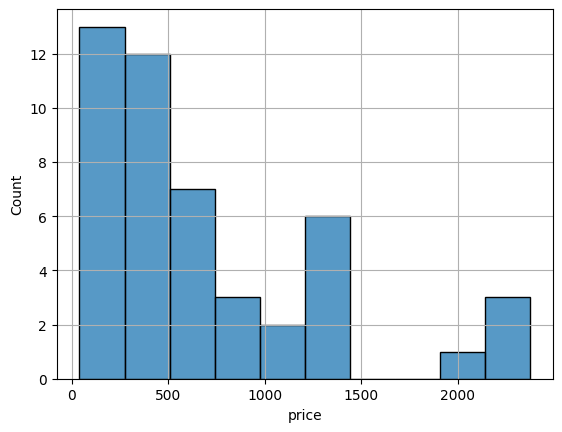

In [23]:
df_bar = df[df.category == 'Bar furniture']
plt.grid()
sns.histplot(df_bar.price, bins= 10);

In [24]:
df1 = df.copy()

df1.dropna(inplace= True)

In [30]:
df1.isnull().sum()
df1.shape

(1899, 12)

In [27]:
df_X = df1[['height', 'width', 'depth', 'price']]

Best features: [0 1 3]
[[ 100.   60.   69.]
 [  43.   74.  225.]
 [  91.   40.  345.]
 ...
 [ 236.  100. 2100.]
 [ 236.  150. 3985.]
 [ 236.  200. 2045.]]


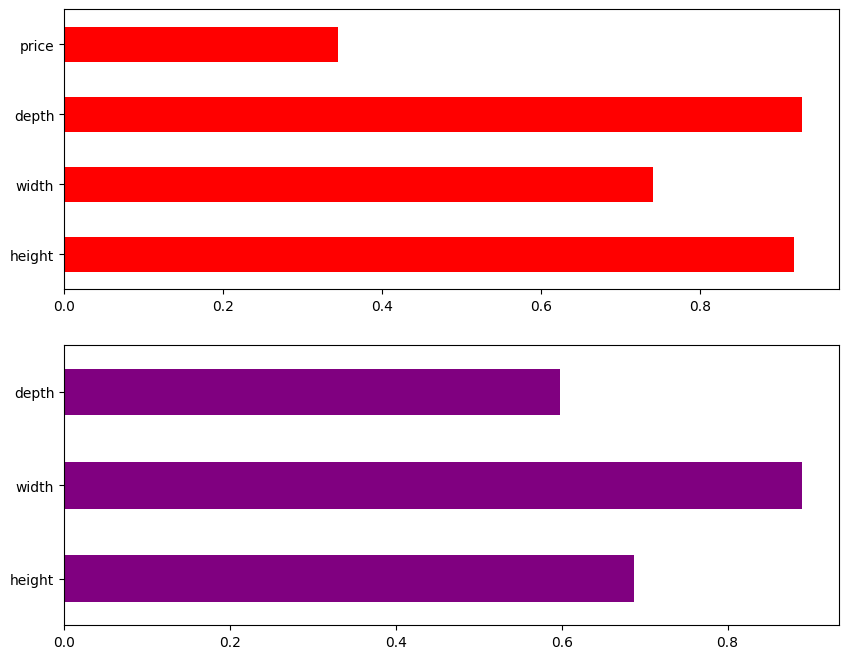

In [28]:
# chi2 - квадрат Пірсона використовується для вимірювання статистичної залежності між категоріальними змінними
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, mutual_info_regression
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

w_df_X = df1[['height', 'width', 'depth', 'price']]
w_df_y = df1['category']

# descrete 'category'
importance_0 = mutual_info_classif(w_df_X, w_df_y) #  для обчислення взаємної інформації між ознаками і цільовою змінною
feature_importances_0 = pd.Series(importance_0, w_df_X.columns)
feature_importances_0.plot(kind='barh', color='red', ax = ax1)

w_df_X_1 = df1[['height', 'width', 'depth']]
w_df_y_1 = df1['price']

# long 'price'
importance_1 = mutual_info_regression(w_df_X_1, w_df_y_1)
feature_importances_1 = pd.Series(importance_1, w_df_X_1.columns)
feature_importances_1.plot(kind='barh', color='purple', ax = ax2)

chi2_features = SelectKBest(chi2, k=3) # кращій результат, SelectKBest з використанням методу chi2 для вибору кращих ознка 
X_kbest_features = chi2_features.fit(w_df_X, w_df_y)
print('Best features:', X_kbest_features.get_support(indices=True))

transformed_X = chi2_features.transform(w_df_X)
print(transformed_X)

plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

logistic = LogisticRegression(C = 0.1, penalty= 'l1', solver = 'liblinear', random_state= 42).fit(w_df_X, w_df_y)

model = SelectFromModel(logistic, prefit= True, max_features= 3, threshold= '0.8*mean')

X_new = model.transform(w_df_X)
print(model.get_support(indices=True), X_new)

[1 2] [[ 60.  50.]
 [ 74.  60.]
 [ 40.  45.]
 ...
 [100.  60.]
 [150.  66.]
 [200.  66.]]


In [32]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k = 2).fit(w_df_X_1, w_df_y_1)

data = selector.transform(w_df_X_1)
print(selector.scores_, selector.get_support(indices=True), data)

[ 152.24015162 2753.30085838 1213.01136312] [1 2] [[ 60.  50.]
 [ 74.  60.]
 [ 40.  45.]
 ...
 [100.  60.]
 [150.  66.]
 [200.  66.]]


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_X_1_scaled = pd.DataFrame(scaler.fit_transform(w_df_X_1), columns= w_df_X_1.columns)

df_X_1_scaled.head()

,height,width,depth
0,0.327759,0.138756,0.191406
1,0.137124,0.172249,0.230469
2,0.297659,0.090909,0.171875
3,0.311037,0.114833,0.167969
4,0.311037,0.114833,0.167969


In [34]:
from sklearn.feature_selection import VarianceThreshold # бібліотека для видалення ознак з низькою дисперсією

selector = VarianceThreshold(0.02) # пороговим значенням дисперсії рівним 0.02. Ознаки, у яких дисперсія нижче цього порогу, будуть видалені
selector.fit(df_X_1_scaled) 

df_X_1_scaled.columns[selector.get_support()]

Index(['height', 'width'], dtype='object')

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=3)
model.fit(w_df_X_1, w_df_y_1)

importances = model.feature_importances_
print(importances)

[0.08777242 0.70164313 0.21058444]


price


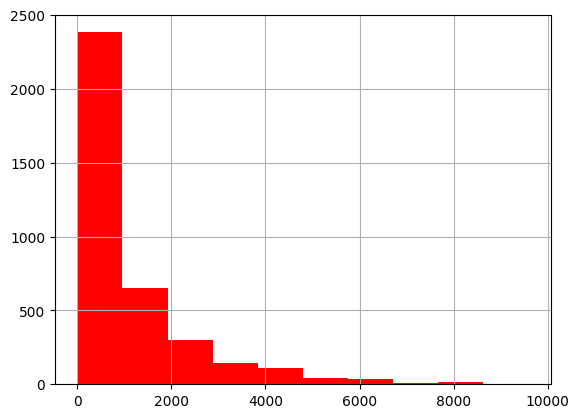

depth


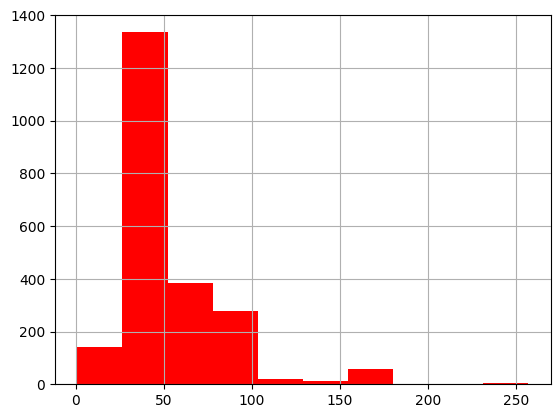

height


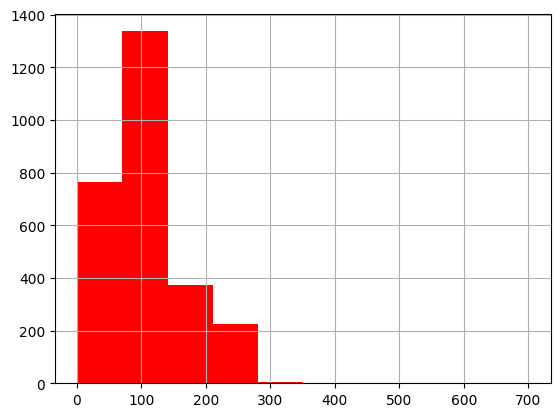

width


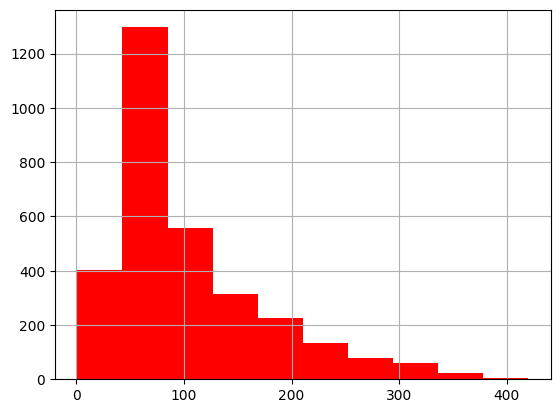

In [36]:
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    plt.hist(df[col], color = 'red', bins = 10)
    plt.grid()
    plt.show()

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

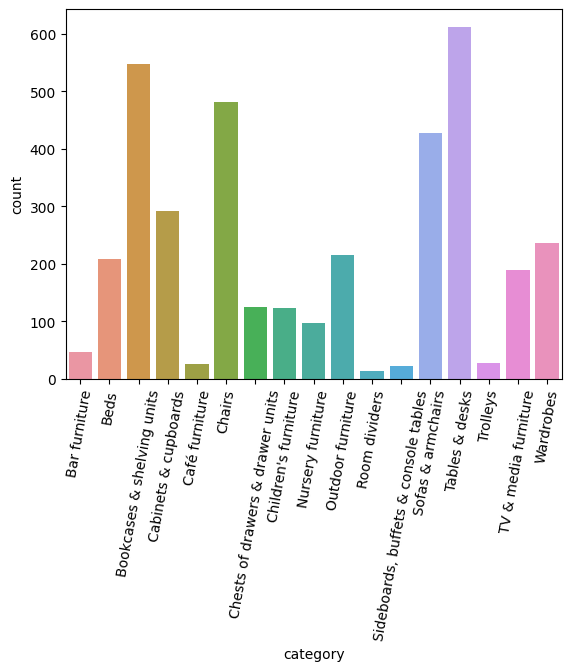

In [39]:
sns.countplot(x = df['category']).set_xticklabels(df['category'].unique(), rotation = 80)

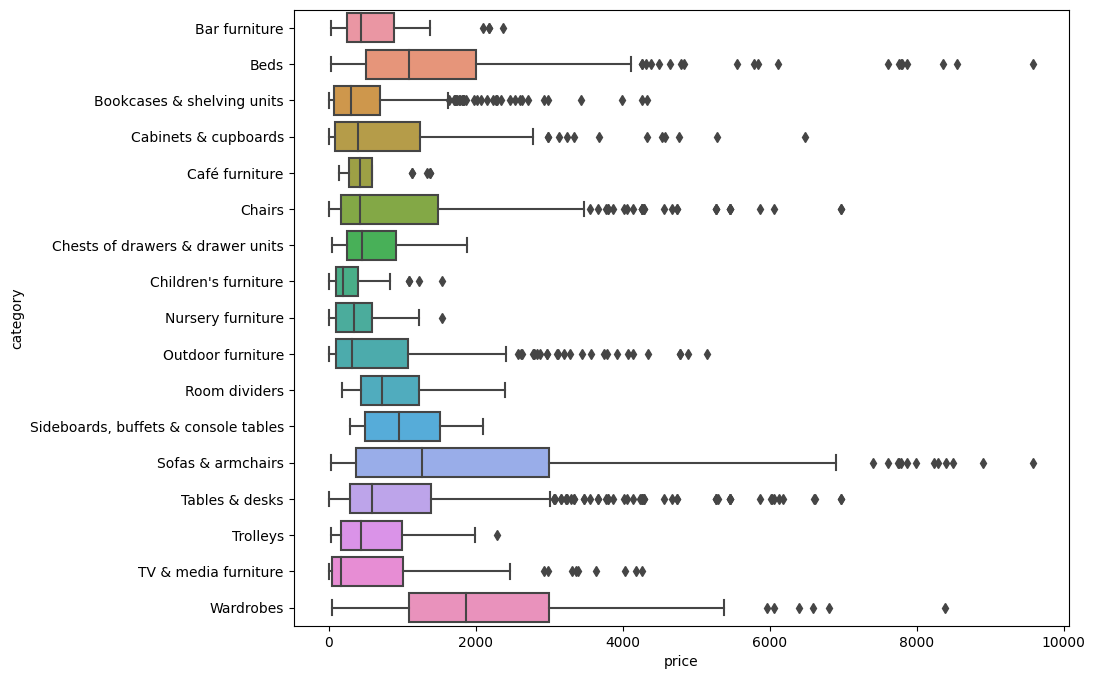

In [40]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'price', y = 'category')
plt.show()

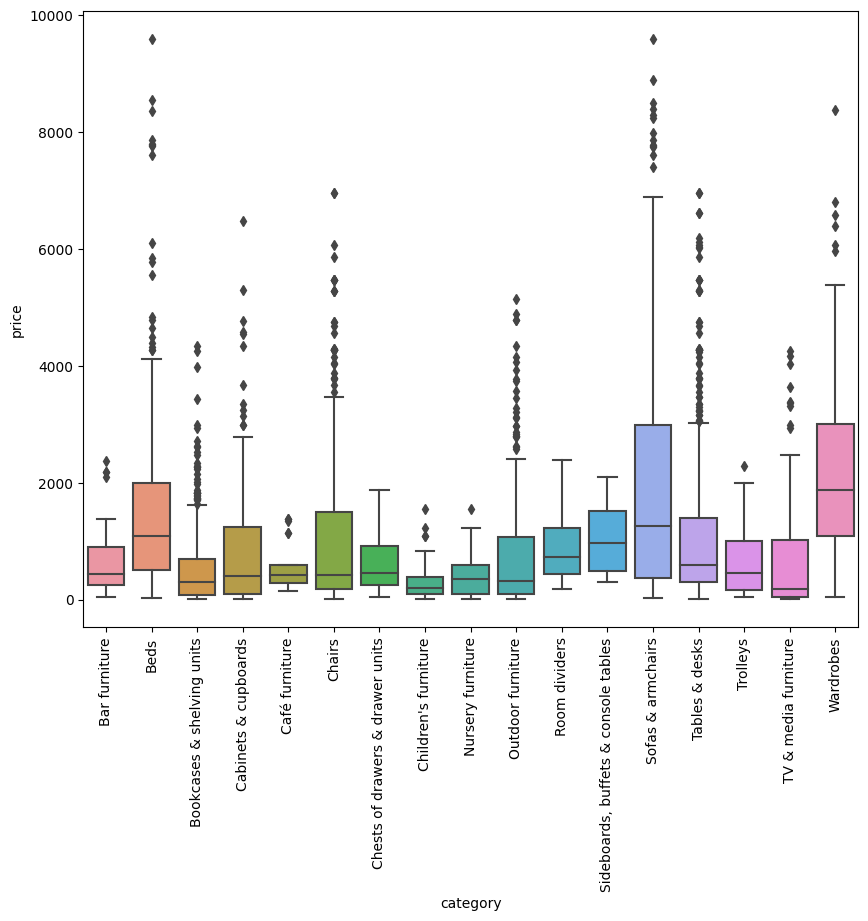

In [41]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'category', y = 'price')
plt.xticks(rotation = 90)
plt.show()

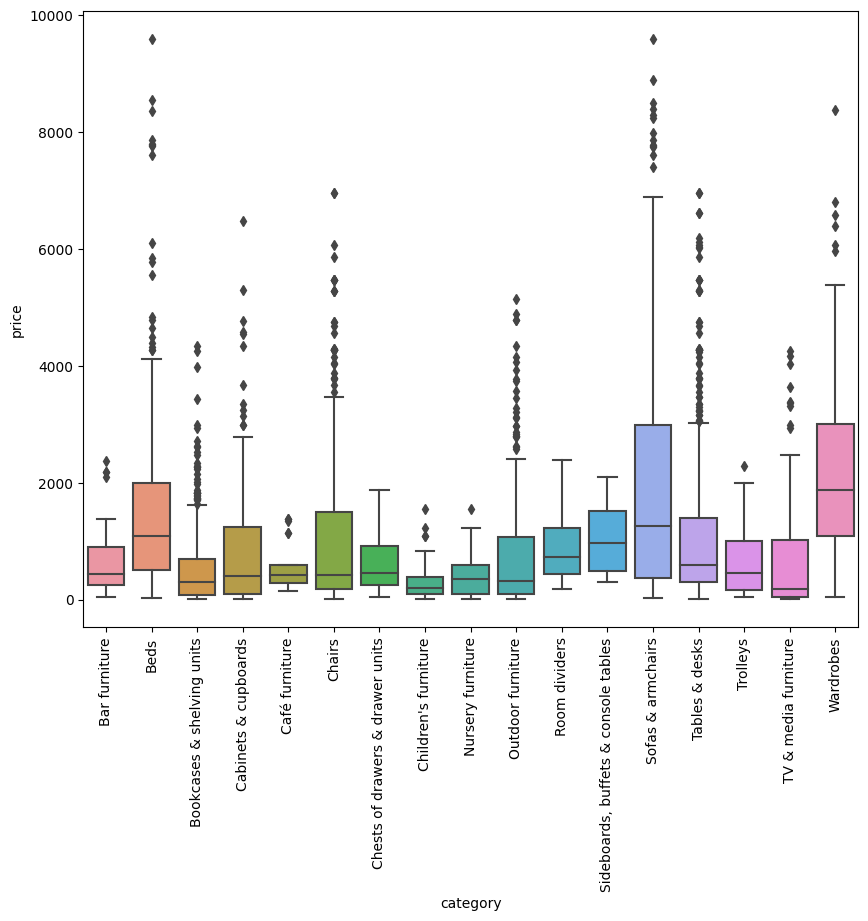

In [42]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'category', y = 'price')
plt.xticks(rotation = 90)
plt.show()

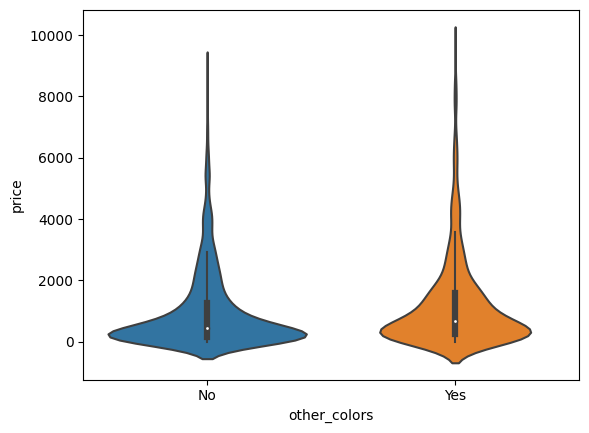

In [43]:
sns.violinplot(data = df, y = 'price', x = 'other_colors')
plt.show()

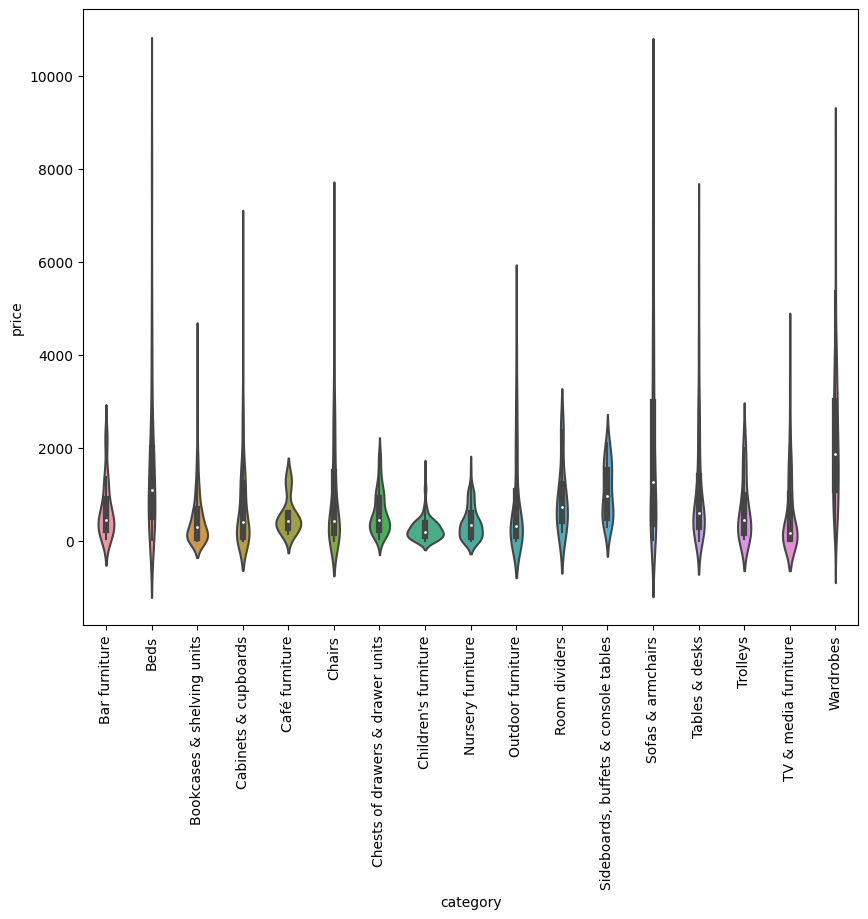

In [44]:
plt.subplots(figsize = (10,8))
sns.violinplot(data = df, y = 'price', x = 'category')
plt.xticks(rotation = 90)
plt.show()

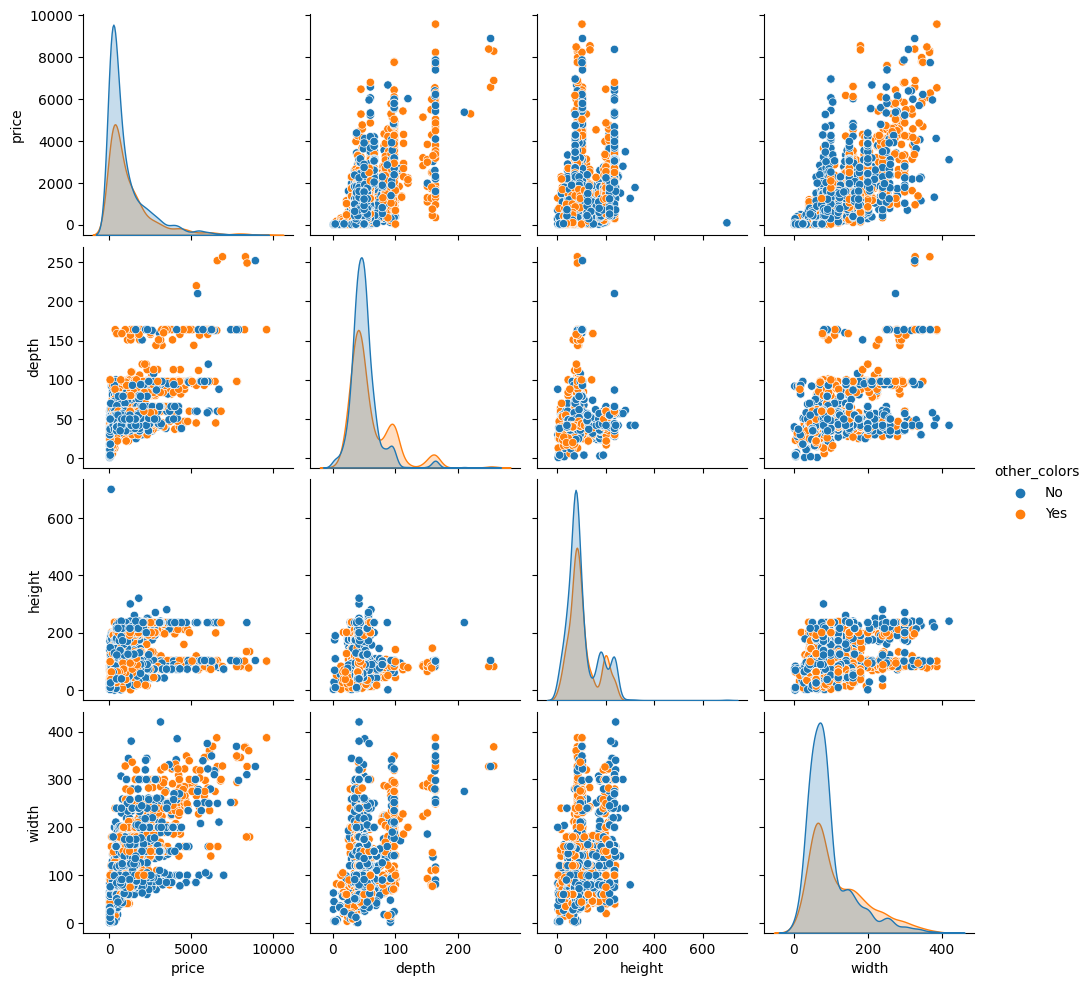

In [45]:
sns.pairplot(df[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors');

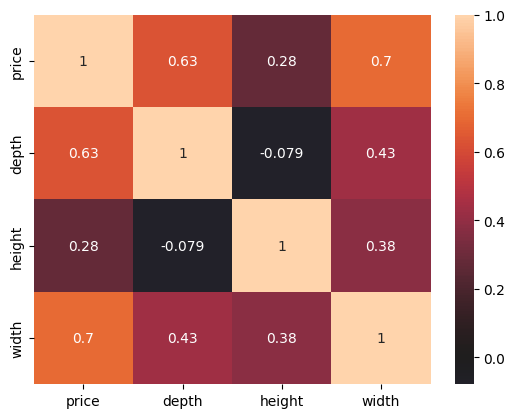

In [48]:
sns.heatmap(df[['price', 'depth', 'height', 'width']].corr(), xticklabels= df[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

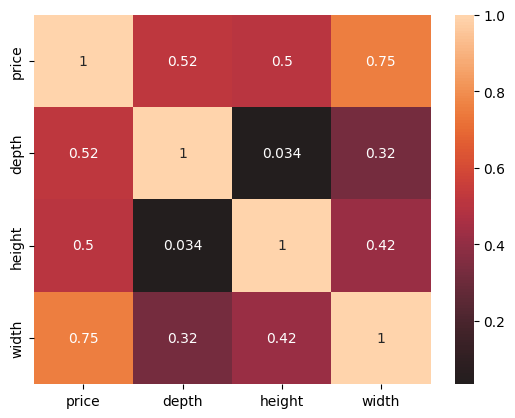

In [51]:
sns.heatmap(df[['price', 'depth', 'height', 'width']].corr(method='spearman'), xticklabels= df[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

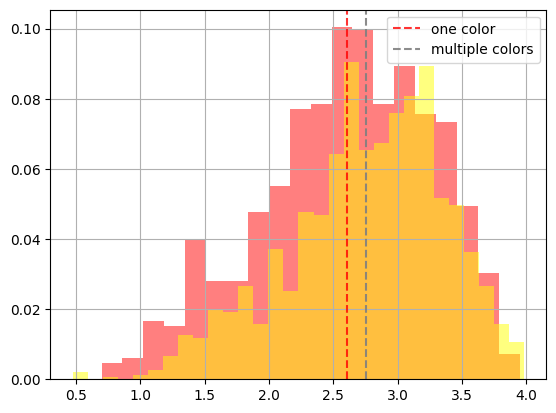

In [52]:
one_color = df[df['other_colors'] == 'No']['price'].apply(np.log10)
mult_color = df[df['other_colors'] == 'Yes']['price'].apply(np.log10)
one_color.name, mult_color.name = 'one color', 'multiple colors'

one_color.hist(alpha = .5, color='red', weights=[1./len(one_color)]*len(one_color), bins=20)
mult_color.hist(alpha = .5, color='yellow', weights=[1./len(mult_color)]*len(mult_color), bins=30)
plt.axvline(one_color.mean(), color='red', alpha=.8, linestyle='dashed')
plt.axvline(mult_color.mean(), color='gray', alpha=.9, linestyle='dashed')
plt.legend([one_color.name, mult_color.name])
plt.show()

In [53]:
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value
    
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    
    designers = value.split("/")
    
    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [54]:
ikea_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col= 0).drop_duplicates()

ikea_dfikea_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col= 0).drop_duplicates()

ikea_df['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))

In [56]:
ikea_df.designer_clean.head()

0    Nicholai Wiig Hansen
1       Francis Cayouette
2       Francis Cayouette
3           Henrik Preutz
4          Marcus Arvonen
Name: designer_clean, dtype: object

In [57]:
X = ikea_df[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = ikea_df['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

'''
Створення конвеєра (Pipeline) для обробки числових ознак. Використовується стандартизація (StandardScaler) для
масштабування числових ознак і використання медіани (SimpleImputer) для заповнення пропущених значень числових ознак.
'''
numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

'''
Створення конвеєра для обробки категоріальних ознак. Використовується заповнення найчастіших значень 
(SimpleImputer) для пропущених значень категоріальних ознак і кодування one-hot (OneHotEncoder) для перетворення категоріальних ознак в бінарні 
'''
categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)

print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036


In [61]:
ikea_df['other_colors_1'] = ikea_df['other_colors'].map(dict(Yes=1, No=0))

median_d = ikea_df.groupby(['category'])['depth'].median()
median_h = ikea_df.groupby(['category'])['height'].median()
median_w = ikea_df.groupby(['category'])['width'].median()

median_price = ikea_df.groupby(['category'])['price'].median()
median_dsgn =  ikea_df.groupby(['designer_clean'])['price'].median()

ikea_df = ikea_df.set_index(['category'])
ikea_df['depth_1'] = ikea_df['depth'].fillna(median_d)
ikea_df['height_1'] = ikea_df['height'].fillna(median_h)
ikea_df['width_1'] = ikea_df['width'].fillna(median_w)
ikea_df['category_median_price'] = median_price

ikea_df = ikea_df.reset_index()

ikea_df = ikea_df.set_index(['designer_clean'])
ikea_df['designer_median_price'] = median_dsgn
ikea_df = ikea_df.reset_index()
ikea_df.head()

,designer_clean,category,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,90420332,FREKVENS,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,368814,NORDVIKEN,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,9333523,NORDVIKEN / NORDVIKEN,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,80155205,STIG,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,30180504,NORBERG,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,150.0


In [59]:
ikea_df.shape

(3694, 20)

In [62]:
# Функция выбора регрессионной модели
def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
        
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [63]:
X1 = ikea_df[['width_1','depth_1','height_1']]
Y1 = ikea_df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.73798,378.38202,710.65503
GradientBoostingRegressor,0.68623,468.80575,777.68650
DecisionTreeRegressor,0.66186,444.32348,807.31160
KNeighborsRegressor,0.64545,489.29287,826.67028
LinearRegression,0.40125,670.61205,1074.28260
RidgeCV,0.40125,670.61209,1074.28264
LassoCV,0.40117,670.70663,1074.34987
SVR,0.35166,641.01016,1117.88731


In [ ]:
from sklearn.model_selection import GridSearchCV
 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=3)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

<Axes: >

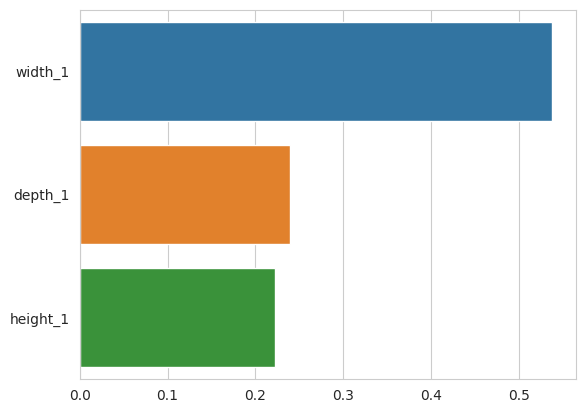

In [65]:
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)